In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

In [10]:
df = pd.read_csv('/Users/apple/Downloads/HR_comma_sep.csv', index_col=None)

In [11]:
df = df.rename(columns={'last_evaluation': 'evaluation',
                        'number_project': 'project_count',
                        'average_montly_hours': 'average_monthly_hours',
                        'time_spend_company': 'years_at_company',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [12]:
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction_level,evaluation,project_count,average_monthly_hours,years_at_company,Work_accident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [13]:
# Looks like about 76% of employees stayed and 24% of employees left. 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [14]:
# Overview of Turnover V.S. Non-turnover Summary Statistics
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction_level,evaluation,project_count,average_monthly_hours,years_at_company,Work_accident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [15]:
# Overview of Total Summary Statistics
df.mean()

turnover                   0.238083
satisfaction_level         0.612834
evaluation                 0.716102
project_count              3.803054
average_monthly_hours    201.050337
years_at_company           3.498233
Work_accident              0.144610
promotion                  0.021268
dtype: float64

In [16]:
# Split data into two groups: 

# Group 1 (Employee Turnover)
turnover_satisfactionDF = df[(df['turnover'] == 1)]

# Group 2 (Employee Non-Turnover)
no_turnover_satisfactionDF = df[(df['turnover'] != 1)]

In [17]:
# Size of Employee Turnover
n1 = len(turnover_satisfactionDF)
# Size of Employee Non-Turnover
n2 = len(no_turnover_satisfactionDF)

# Mean Satisfaction of Employee Turnover
mean1 = turnover_satisfactionDF.mean()
# Mean Satisfaction of Employee Non-Turnover
mean2 = no_turnover_satisfactionDF.mean()

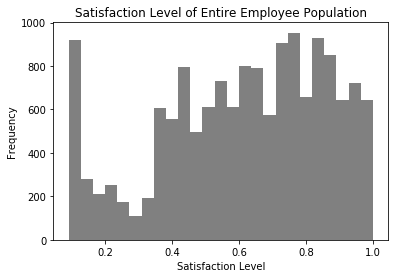

In [20]:
# Graph of Entire Employee Population (Employee Turnover))
df["satisfaction_level"].plot(kind='hist',color='0.5', bins = 25, title = 'Satisfaction Level of Entire Employee Population').set_xlabel('Satisfaction Level')
st_100=round((df["satisfaction_level"]).std(),4)

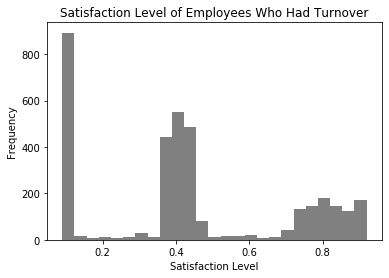

In [22]:

# Graph of Employee Turnovered
turnover_satisfactionDF["satisfaction_level"].plot(kind='hist',color='0.5', bins = 25, title = 'Satisfaction Level of Employees Who Had Turnover').set_xlabel('Satisfaction Level')
st_100=round((turnover_satisfactionDF["satisfaction_level"]).std(),4)

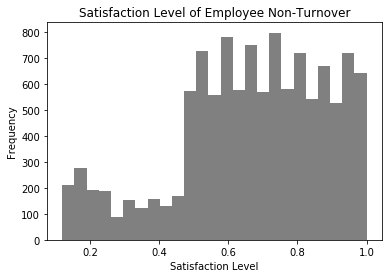

In [24]:
# Graph of Employee Non-Turnover
no_turnover_satisfactionDF["satisfaction_level"].plot(kind='hist',color='0.5', bins = 25, title = 'Satisfaction Level of Employee Non-Turnover').set_xlabel('Satisfaction Level')
st_100=round((no_turnover_satisfactionDF["satisfaction_level"]).std(),4)

## T-TEST
The T-test is a statistical test used to determine whether a numeric data sample of differs significantly from the population or whether two samples differ from one another.

### One-Sample T-Test (Measuring Satisfaction Level)
A one-sample t-test checks whether a sample mean differs from the population mean. Let's test to see whether the average satisfaction level of employees that had a turnover differs from the entire employee population.

Hypothesis Testing: Is there significant difference in the means of satisfaction level between employees who had a turnover and the entire employee population?

Null Hypothesis: (H0: pTS = pES) The null hypothesis would be that there is no difference in satisfaction level between employees who did turnover and the entire employee population.

Alternate Hypothesis: (HA: pTS != pES) The alternative hypothesis would be that there is a difference in satisfaction level between employees who did turnover and the entire employee population.

In [26]:
# Let's compare the means of our employee turnover satisfaction against the employee population satisfaction
emp_population_satisfaction = df['satisfaction_level'].mean()
emp_turnover_satisfaction = df[df['turnover']==1]['satisfaction_level'].mean()

print( 'The mean for the employee population is: ' + str(emp_population_satisfaction) )
print( 'The mean for the employees that had a turnover is: ' + str(emp_turnover_satisfaction) )

The mean for the employee population is: 0.6128335222348166
The mean for the employees that had a turnover is: 0.44009801176140917


### Conducting the T-Test
Let's conduct a t-test at 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the employee population. To conduct a one sample t-test, we can use the stats.ttest_1samp() function:

In [28]:
import scipy.stats as stats

stats.ttest_1samp(a=  df[df['turnover']==1]['satisfaction_level'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population_satisfaction)  # Employee Population satisfaction mean

Ttest_1sampResult(statistic=-39.10948894348446, pvalue=9.012781195378076e-279)

The test result shows the test statistic "t" is equal to -39.109. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with stats.t.ppf():

In [29]:
degree_freedom = len(df[df['turnover']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9606285215955626
The t-distribution right quartile range is: 1.9606285215955621


Note: The alternative hypothesis we are checking is whether the sample mean differs (is not equal to) the population mean.

A p-value of 9.012781195378076e-279 means we'd expect to see data as extreme as our sample due to chance way less than 5% of the time if the null hypothesis was true. In this case, the p-value is lower than our significance level α (equal to 1-conf.level or 0.05) so we should reject the null hypothesis. If we were to construct a 95% confidence interval for the sample it would not capture employee population satisfaction mean of 0.61:

In [31]:
 # Sample stdev/sample size
sigma = df[df['turnover']==1]['satisfaction_level'].std()/math.sqrt(degree_freedom + 1) 

stats.t.interval(0.95,                        
                 df = degree_freedom,            
                 loc = emp_turnover_satisfaction, # Sample mean
                 scale= sigma)

(0.4314396843805811, 0.4487563391422372)

### One-Sample T-Test Summary
Based on the statistical analysis of a one sample t-test, there seems to be some significant difference between the mean satisfaction of employees who had a turnover and the entire employee population. The super low P-value of 9.012781195378076e-279 at a 5% confidence level is a good indicator to reject the null hypothesis. But this does not neccessarily mean that there is practical significance. We would have to conduct more experiments or maybe collect more data about the employees in order to come up with a more accurate finding. I would recommend to gather more variables from the database that could have more impact on determining employee turnover and satisfaction such as their distance from home, gender, age, and etc.